In [ ]:
#Aim here is to build a dashboard of the Standard deviations, returns, and sharpe ratios of the basecamp portfolios, basically balanced, growth, etc and focus on backtesting 

In [30]:
import os
import requests
import pandas as pd
import numpy as np 
import seaborn as sns 
import hvplot.pandas
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [31]:
import yfinance as yf

In [32]:
def read_data(data, start, end):
    data_df = yf.download(data, start, end)
    data_df.dropna(inplace = True)
    dataclose_df = data_df["Adj Close"]
    return dataclose_df

In [34]:
defport = read_data(['DHOF.AX', 'MVA.AX', 'AAA.AX'],"2019-04-01","2022-04-15")
growport = read_data(['EX20.AX', 'QUAL.AX', 'VHY.AX'],"2019-04-01","2022-04-15")
indexport = read_data(['^AXJO','JABAX'],"2019-04-01", "2022-04-15")
# 'MCSG.XA','MCSI.XA', include these 'XRO' 

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed


In [35]:
close_df = pd.concat([defport, growport, indexport], axis = "columns", join = "inner")
close_df.dropna(inplace = True)
close_df.tail()

,AAA.AX,DHOF.AX,MVA.AX,EX20.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,
2022-04-08,50.070000,9.59,24.400000,20.629999,38.799999,69.980003,42.220001,7478.000000
2022-04-11,50.080002,9.59,24.379999,20.610001,38.450001,69.949997,41.669998,7485.200195
2022-04-12,50.080002,9.59,24.150000,20.459999,37.880001,69.709999,41.570000,7454.000000
2022-04-13,50.080002,9.59,24.150000,20.549999,38.009998,70.199997,41.900002,7479.000000
2022-04-14,50.080002,9.55,24.120001,20.760000,38.290001,70.290001,41.490002,7523.399902


In [36]:
closeindex_df = (indexport)
closeindex_df.dropna(inplace = True)
closeindex_df.head()

,JABAX,^AXJO
Date,,
2019-04-01,30.622850,6217.000000
2019-04-02,30.631956,6242.399902
2019-04-03,30.641058,6285.000000
2019-04-04,30.713890,6232.799805
2019-04-05,30.777607,6181.299805


In [37]:
datareturns_df = close_df.pct_change().copy()
datareturns_df.head(10)

,AAA.AX,DHOF.AX,MVA.AX,EX20.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.0,0.000421,-0.016810,-0.006199,-0.006282,-0.006797,0.006028,-0.007654
2022-01-12,0.0,0.000241,-0.003579,0.005278,0.005385,0.005931,0.001110,0.006603
2022-01-13,0.0,-0.001382,-0.003591,-0.000477,-0.008384,0.010582,-0.009754,0.004772
2022-01-14,0.0,0.000632,-0.005206,-0.006208,-0.013152,-0.006133,-0.002686,-0.010770
2022-01-18,0.0,-0.001033,-0.000805,0.001922,0.007615,0.000752,-0.013917,0.002015
2022-01-19,0.0,-0.001405,-0.000403,-0.008153,-0.022201,-0.008873,-0.004097,-0.010299
2022-01-20,0.0,0.000663,-0.012898,-0.001451,0.000000,0.005311,-0.006400,0.001350
2022-01-21,0.0,-0.001296,-0.017558,-0.023245,-0.018116,-0.022491,-0.009432,-0.022690


In [38]:
dailyreturn_std = datareturns_df.std() 
dailyreturn_std

AAA.AX     0.000143
DHOF.AX    0.002847
MVA.AX     0.011908
EX20.AX    0.010060
QUAL.AX    0.014050
VHY.AX     0.008846
JABAX      0.009558
^AXJO      0.009368
dtype: float64

In [39]:
#get daily returns on defensive portfolio 
defreturns_df = defport.pct_change().copy() 
defreturns_df.head()

,AAA.AX,DHOF.AX,MVA.AX
Date,,,
2022-01-10,NaN,NaN,NaN
2022-01-11,0.0,0.000421,-0.016810
2022-01-12,0.0,0.000241,-0.003579
2022-01-13,0.0,-0.001382,-0.003591
2022-01-14,0.0,0.000632,-0.005206


In [40]:
defport_std = defreturns_df.std() 
defport_std

AAA.AX     0.000141
DHOF.AX    0.002805
MVA.AX     0.011765
dtype: float64

In [41]:
# Calculate the annualized standard deviation (252 trading days)
annualdef_std = defport_std * np.sqrt(252)
annualdef_std

AAA.AX     0.002242
DHOF.AX    0.044522
MVA.AX     0.186767
dtype: float64

In [42]:
#look at correlations for defensive holdings first 
defportcorr = defreturns_df.corr()
defportcorr

,AAA.AX,DHOF.AX,MVA.AX
AAA.AX,1.000000,0.041568,-0.233348
DHOF.AX,0.041568,1.000000,-0.097264
MVA.AX,-0.233348,-0.097264,1.000000


<AxesSubplot:>

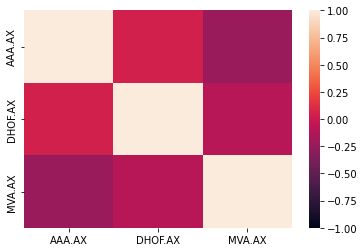

In [43]:
sns.heatmap(defportcorr, vmin=-1, vmax=1)

In [44]:
# Calculate sharpe ratios of defensive portfolio
sharpe_ratios = (datareturns_df.mean() * 252) / (dailyreturn_std * np.sqrt(252))
sharpe_ratios

AAA.AX     0.341316
DHOF.AX   -3.712993
MVA.AX    -1.111376
EX20.AX   -0.165200
QUAL.AX   -1.896562
VHY.AX     1.721076
JABAX     -1.879596
^AXJO      0.339371
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

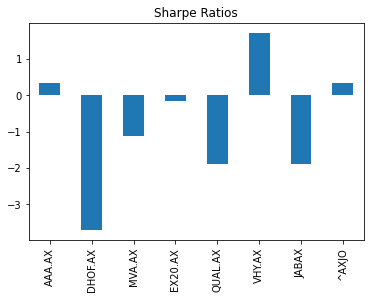

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(title="Sharpe Ratios")

In [46]:
growreturns_df = growport.pct_change().copy() 
growreturns_df.head() 

,EX20.AX,QUAL.AX,VHY.AX
Date,,,
2019-04-01,NaN,NaN,NaN
2019-04-02,0.007919,0.006915,0.004170
2019-04-03,0.002806,0.005723,0.006920
2019-04-04,-0.006156,-0.001517,-0.009966
2019-04-05,-0.009009,-0.001520,-0.005207


In [47]:
growport_std = growreturns_df.std() 
growport_std

EX20.AX    0.011467
QUAL.AX    0.010491
VHY.AX     0.011725
dtype: float64

In [48]:
# Calculate the annualized standard deviation (252 trading days)
annualgrow_std = growport_std * np.sqrt(252)
annualgrow_std

EX20.AX    0.182035
QUAL.AX    0.166536
VHY.AX     0.186135
dtype: float64

In [49]:
growcorrelation = growreturns_df.corr() 
growcorrelation

,EX20.AX,QUAL.AX,VHY.AX
EX20.AX,1.000000,0.644967,0.807296
QUAL.AX,0.644967,1.000000,0.567963
VHY.AX,0.807296,0.567963,1.000000


<AxesSubplot:>

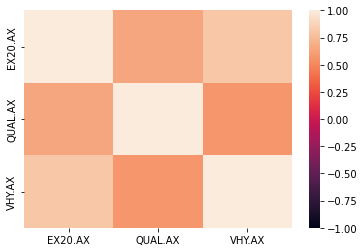

In [50]:
sns.heatmap(growcorrelation, vmin=-1, vmax=1)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>],
      dtype=object)

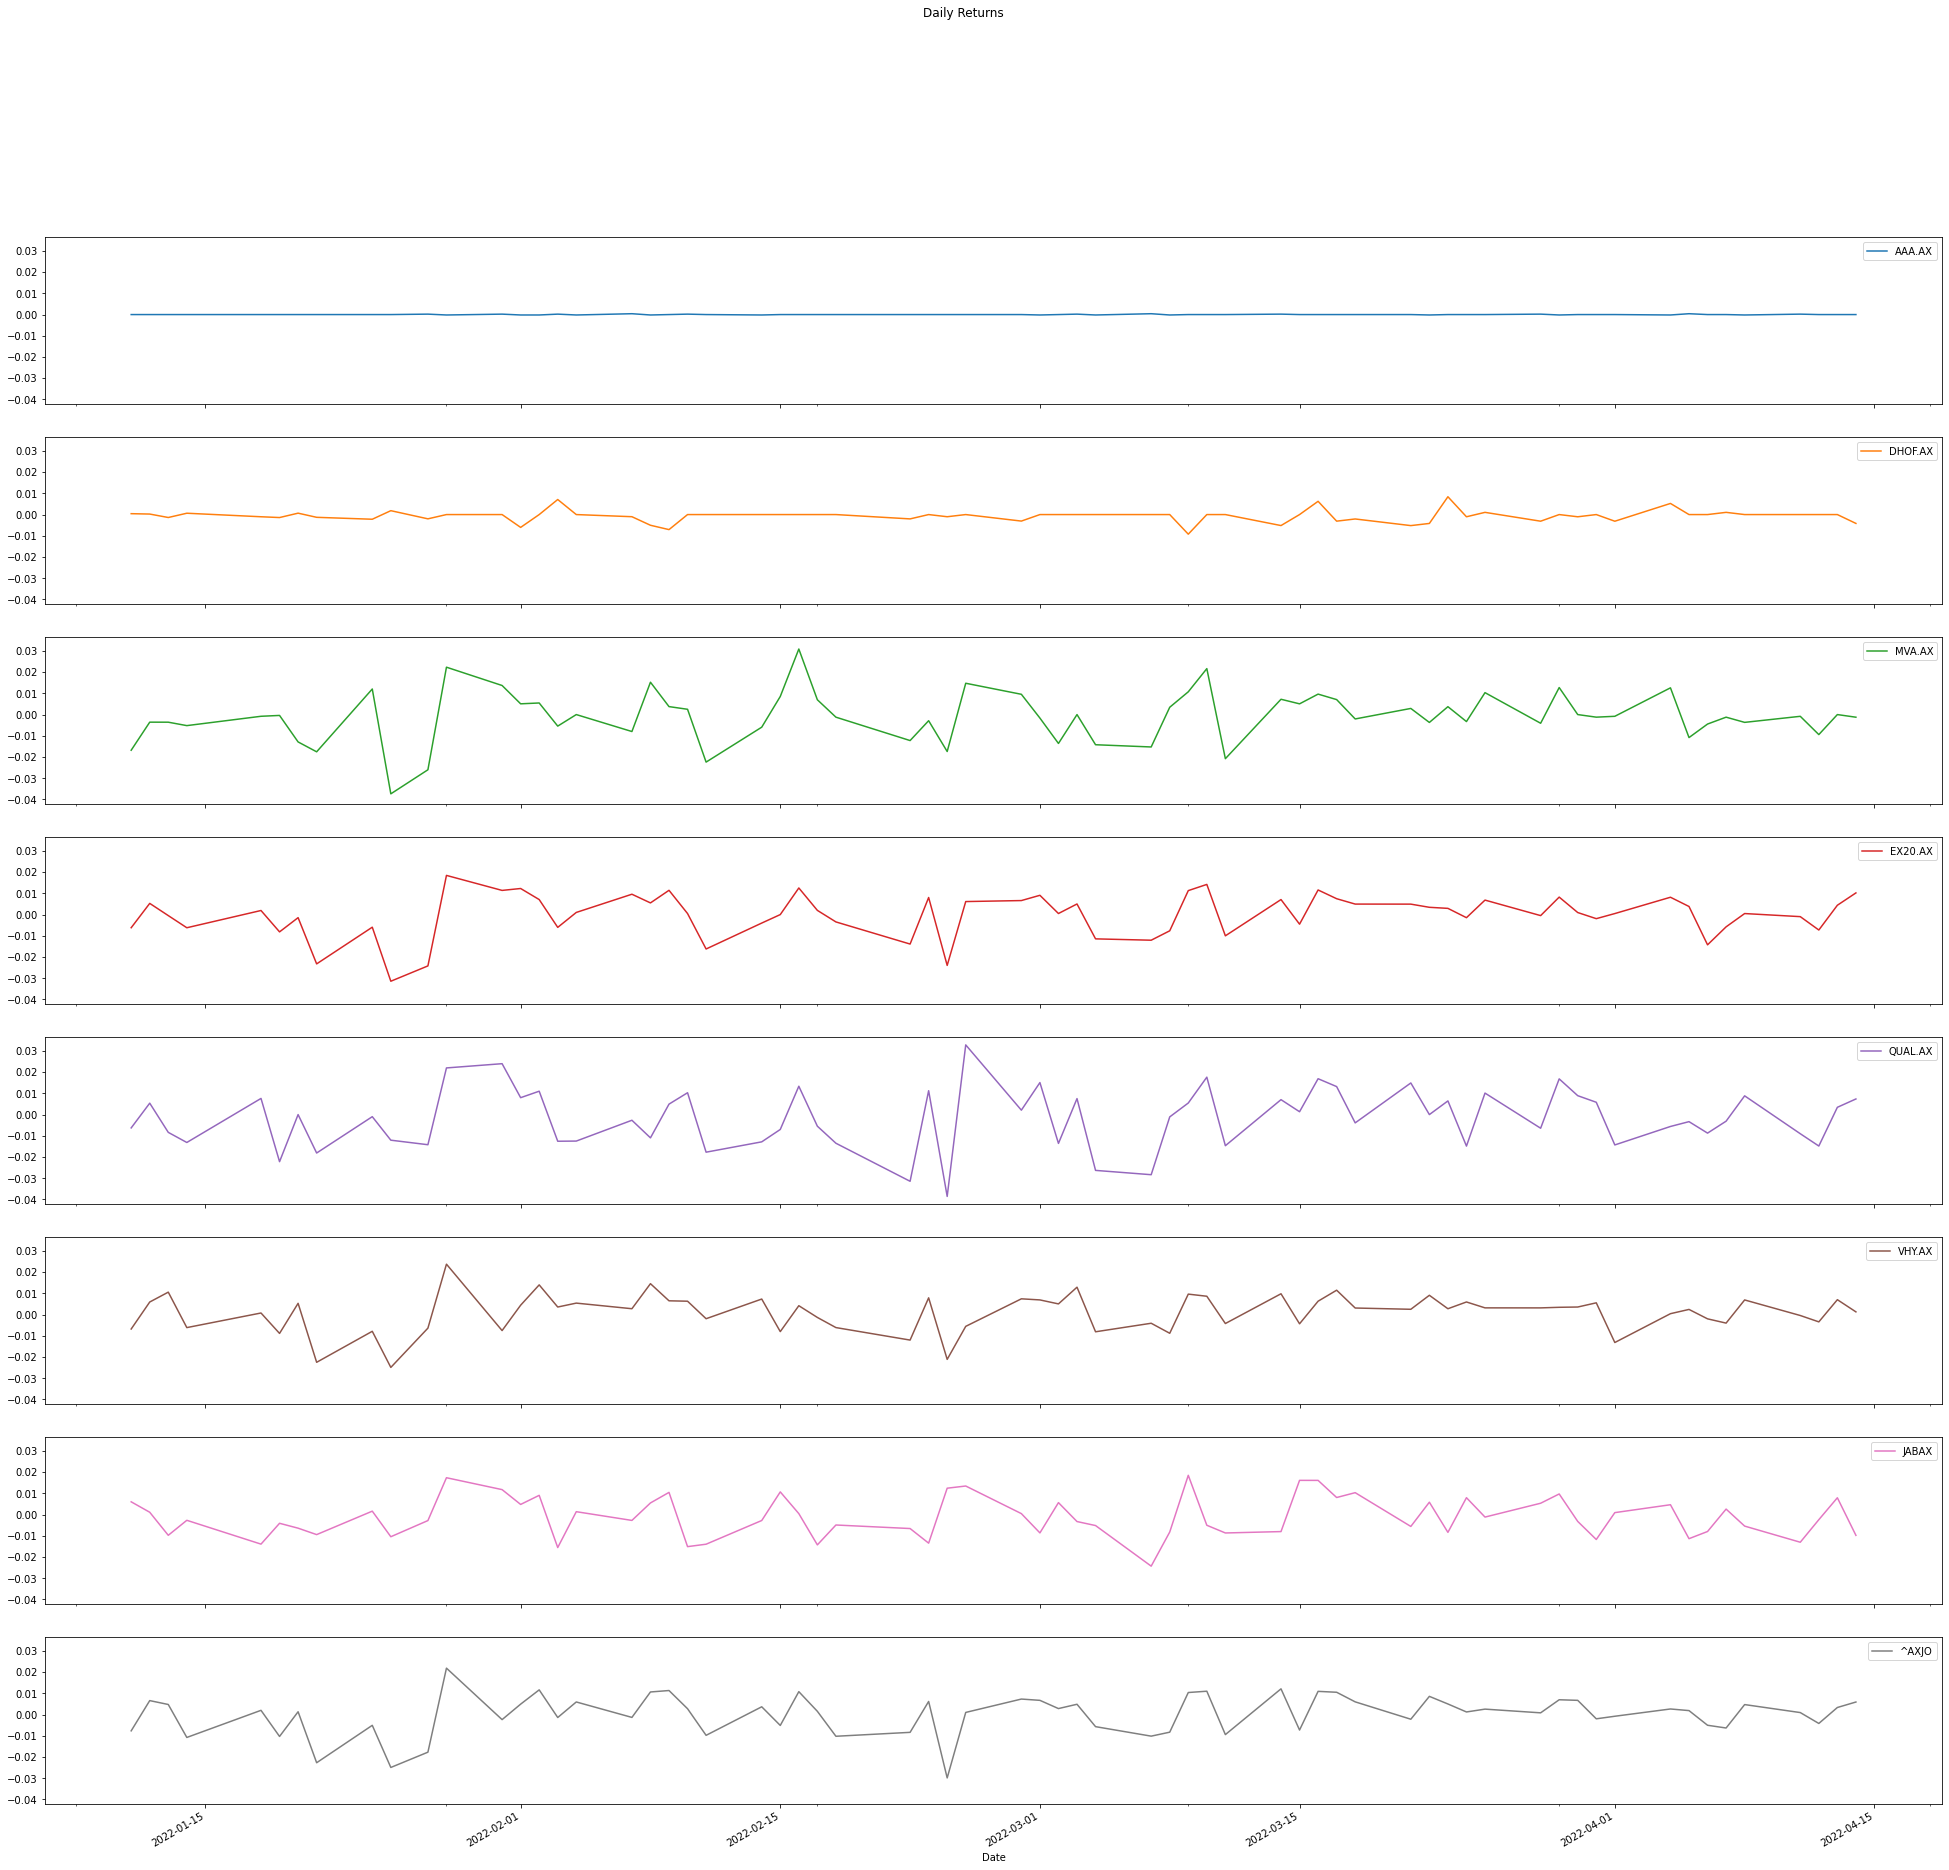

In [51]:
datareturns_df.plot(subplots=True,figsize=(34, 32), title="Daily Returns", sharey=True)

#graph individually,for loop graphing each column

In [52]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + datareturns_df).cumprod()

<AxesSubplot:title={'center':'Cumulative Returns Expedition Portfolio'}, xlabel='Date'>

<Figure size 2520x1800 with 0 Axes>

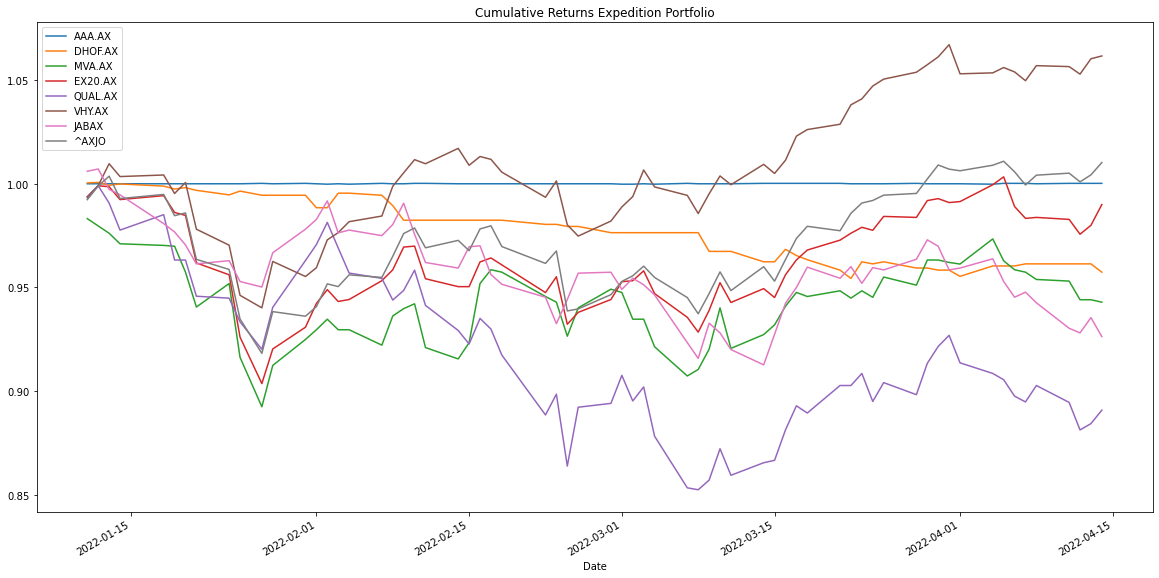

In [53]:
# Plot cumulative returns
from matplotlib.pyplot import figure

figure(figsize=(35, 25))
# Plot cumulative returns
cumulative_returns.plot(figsize=(20, 10), title="Cumulative Returns Expedition Portfolio")

In [54]:
datareturns_df.head(10)

,AAA.AX,DHOF.AX,MVA.AX,EX20.AX,QUAL.AX,VHY.AX,JABAX,^AXJO
Date,,,,,,,,
2022-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-11,0.0,0.000421,-0.016810,-0.006199,-0.006282,-0.006797,0.006028,-0.007654
2022-01-12,0.0,0.000241,-0.003579,0.005278,0.005385,0.005931,0.001110,0.006603
2022-01-13,0.0,-0.001382,-0.003591,-0.000477,-0.008384,0.010582,-0.009754,0.004772
2022-01-14,0.0,0.000632,-0.005206,-0.006208,-0.013152,-0.006133,-0.002686,-0.010770
2022-01-18,0.0,-0.001033,-0.000805,0.001922,0.007615,0.000752,-0.013917,0.002015
2022-01-19,0.0,-0.001405,-0.000403,-0.008153,-0.022201,-0.008873,-0.004097,-0.010299
2022-01-20,0.0,0.000663,-0.012898,-0.001451,0.000000,0.005311,-0.006400,0.001350
2022-01-21,0.0,-0.001296,-0.017558,-0.023245,-0.018116,-0.022491,-0.009432,-0.022690


In [55]:
# Set weights
weights = [0.05, 0.225, 0.225, 0.0908, 0.225, 0.1842, 0.00, 0.00]

In [56]:
# Use the `dot` function to sum the product each weight and the corresponding stock daily return.
basecampbal_returns = datareturns_df.dot(weights)
# Rename `Close` Column to be specific to this portfolio.
basecampbal_returns.tail(30)

Date
2022-03-04   -0.011661
2022-03-07   -0.011644
2022-03-08   -0.001797
2022-03-09    0.004369
2022-03-10    0.011729
2022-03-11   -0.009664
2022-03-14    0.004504
2022-03-15    0.000231
2022-03-16    0.009599
2022-03-17    0.006658
2022-03-18   -0.000790
2022-03-21    0.003743
2022-03-22    0.000202
2022-03-23    0.004954
2022-03-24   -0.003355
2022-03-25    0.006047
2022-03-28   -0.002523
2022-03-29    0.008027
2022-03-30    0.002516
2022-03-31    0.001881
2022-04-01   -0.006489
2022-04-04    0.003568
2022-04-05   -0.002373
2022-04-06   -0.004634
2022-04-07   -0.002005
2022-04-08    0.002468
2022-04-11   -0.002371
2022-04-12   -0.006751
2022-04-13    0.002466
2022-04-14    0.001604
dtype: float64

<AxesSubplot:title={'center':'Rolling Std Dev BaseCamp Balanced'}, xlabel='Date'>

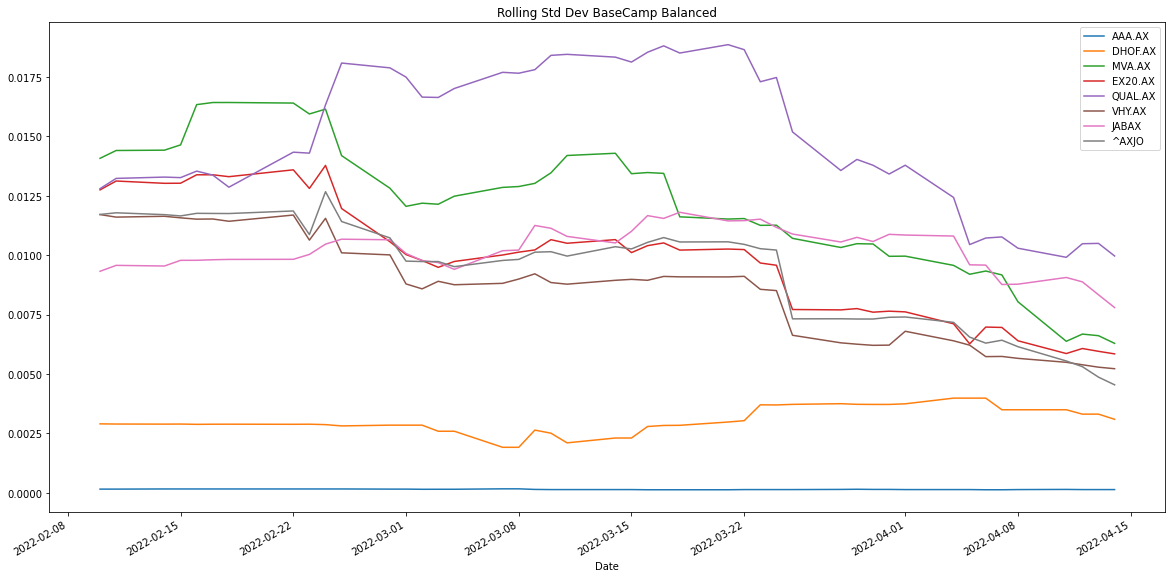

In [57]:
# Calculate rolling standard deviation
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rollingbasecampbal_std = datareturns_df.rolling(window=21).std()


# Plot the rolling standard deviation
rollingbasecampbal_std.plot(figsize=(20, 10), title="Rolling Std Dev BaseCamp Balanced")
# Plot rolling standard deviation